# Miscellaneous Molecules Calculations


In [3]:
import numpy as np

In [4]:
import MarksConstants as mc

In [5]:
import matplotlib.pyplot as plt

## Distance Moved

the one-axis velocity distribution is a gaussian with waist $w_{th}=\sqrt{4k_BT/m}$


most particles will collide with velocities less than this therefore, so the waist velocity is a good benchmark.

In [6]:
vmax = np.sqrt(4*mc.k_B * 100e-6/mc.Rb87_M)
vmin = np.sqrt(4*mc.k_B * 10e-6/mc.Rb87_M)

In [7]:
print(vmax, 'm/s')
print(vmin, 'm/s')
print(vmax*mc.Rb87_D1_Lifetime*1e9, 'nm')
print(vmin*mc.Rb87_D1_Lifetime*1e9, 'nm')

0.19562044299092413 m/s
0.06186061567424415 m/s
5.418686270848598 nm
1.713539054176563 nm


## rotational energy splittings calculation

rotational energy is given by $\frac{\hbar^2 \ell (\ell+1)}{2I}$. $I=\sum mr^2$, so for a homonuclear molecule, it's $I=2m(r/2)^2 = mr^2/2$, so $\frac{\hbar^2\ell(\ell+1)}{mr^2}$

In [17]:
def rEnergy(rv,ell):
    return mc.hbar**2*ell*(ell+1)/(mc.Rb87_M*rv**2)

molecules are generally colliding on the order of 50nm distance apart, with 10-100$\mu K$

In [18]:
rvals = np.linspace(10e-9,50e-9,100)
splittings = []
statenums = []
for rval in rvals:
    rEnergyVals = []
    for ellVal in np.arange(100):
        rEnergyVals = np.append(rEnergyVals, rEnergy(rval,ellVal)/mc.h/1e6)
    closestState = np.argmin(abs(rEnergyVals - 4))
    statenums.append(closestState)
    splittings.append(rEnergyVals[closestState+1]-rEnergyVals[closestState])

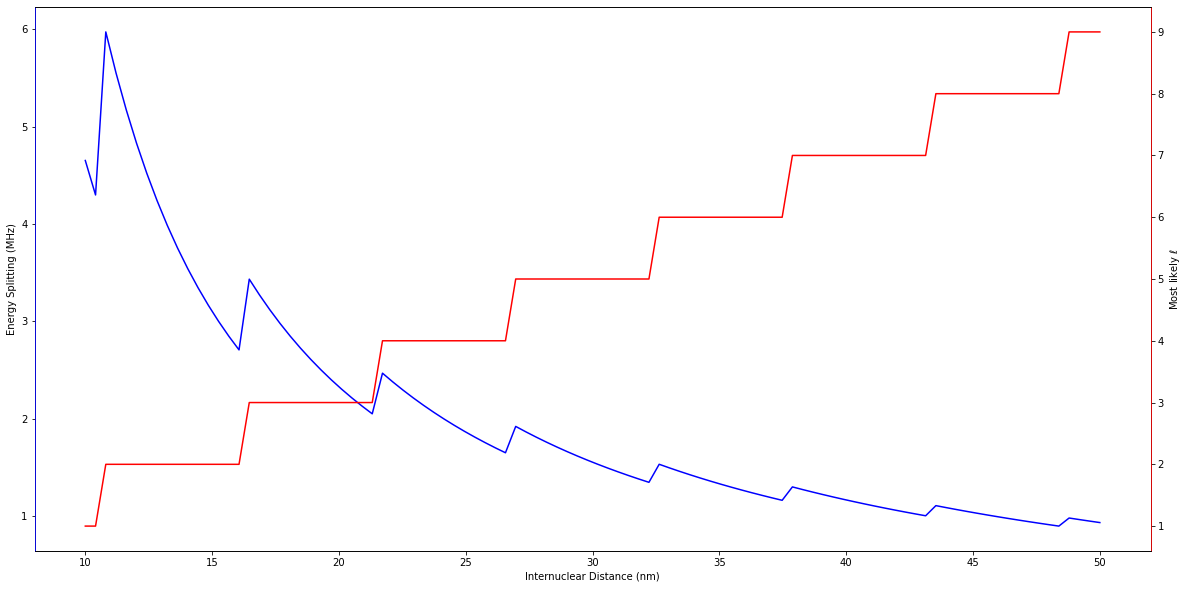

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(rvals*1e9,splittings,'-b')
ax.set_ylabel('Energy Splitting (MHz)')
ax2 = ax.twinx()
ax2.plot(rvals*1e9, statenums,color='r')
ax2.spines['right'].set_color('r')
ax2.spines['left'].set_color('b')
ax.set_xlabel('Internuclear Distance (nm)')
ax2.set_ylabel('Most likely $\ell$')
fig.savefig('Rotational_Energy_Separation.png', dpi=400)

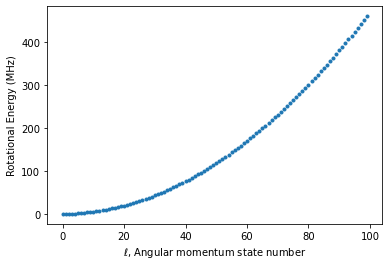

In [20]:
plt.plot( rEnergyVals,'.')
plt.ylabel( 'Rotational Energy (MHz)');
plt.xlabel( '$\ell$, Angular momentum state number');
#plt.axhline(4)
#plt.axhline(2)
#plt.axhline(0.2)
